# <center> Trabajo 2 - Aprendizaje automático 23-24 </center>

## <center> Datos del alumno </center>

### Apellidos: Alarcón Tamayo
### Nombre: Alfonso

En este apartado añadiré todas las importanciones para tenerlas agrupadas en una sola celda y sea más sencillo encontrarlas

In [1]:
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from collections import Counter

from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

from yellowbrick.classifier import ROCAUC
from yellowbrick.datasets import load_game
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split as tts
from yellowbrick.classifier import PrecisionRecallCurve
from yellowbrick.datasets import load_game


import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

# <center> 1º Selección del conjunto de trabajo </center>

Entre las opciones de los conjuntos de datos tenemos:
    
    * Amphibians Data Set : Conjunto de datos para detectar tipos de anfibios cerca de los embalses de agua
        
    * Raisin Dataset Data Set : El conjunto ha sido borrado o está caido por lo que no he podido usarlo
        
    * HCV data Data Set : Conjunto de detección de Hepatitis en pacientes de un hospital
        
    * MAGIC Gamma Telescope Data Set : Conjunto de resgristos de partículas Gamma detectados con un telescopio
        
    * Productivity Prediction of Garment Employees Data Set : Conjunto para determinar la productividad de los empleados
    


Sobre estos conjuntos he decidido primero descartar aquellos que no tuviesen valores vacios , pues algunos puntos de la evaluación son sobre tratamiento de valores vacios, por lo que los 3 conjuntos que disponen de estos son **Anfibios , Hepatitis y productividad**.


Sobre estos tres he decidido quedarme con el conjunto de **HCV data Data Set**, es decir, el de la **hepatitis**, es el que más me ha interesado y he trabajado con conjuntos de datos parecidos en otras asignaturas de la carrera, además la información del conjunto de datos esta mejor definido y especifica de forma mas clara y concisa la información de las características.

## <center> HCV Data set </center>

El Dataset de HCV es conjunto de datos compuesto por 615 instancias con 12 características cada una, en el que se realiza una clasificación multiclase en que los valores de clasificación(diagnóstico) puede ser:

| Category               | Type        | Nature       | Description                                     | Values                           | Missing Values |
|------------------------|-------------|--------------|-------------------------------------------------|----------------------------------|-----------------|
| Category               | Categorical | Target       | Diagnosis Category                              | '0=Blood Donor', '0s=suspect Blood Donor', '1=Hepatitis', '2=Fibrosis', '3=Cirrhosis' | No              |



Y sus carácterísticas son:

| Column   | Type    | Nature      | Description                                       | Units | Missing Values |
|----------|---------|-------------|---------------------------------------------------|-------|-----------------|
| ID       | Integer | Identifier  | Patient ID                                        | -     | No              |
| Age      | Integer | Feature     | Age                                               | years | No              |
| Sex      | Binary  | Feature     | Sex                                               | -     | No              |
| ALB      | Continuous | Feature  | Albumin                                           | -     | Yes             |
| ALP      | Continuous | Feature  | Alkaline Phosphotase                              | -     | Yes             |
| AST      | Continuous | Feature  | Aspartate Aminotransferase                         | -     | Yes             |
| BIL      | Continuous | Feature  | Bilirubin                                         | -     | No              |
| CHE      | Continuous | Feature  | Che                | -     | No              |
| CHOL     | Continuous | Feature  | Cholesterol                                       | -     | Yes             |
| CREA     | Continuous | Feature  | Creatinine                                        | -     | No              |
| CGT      | Continuous | Feature  | CGT                                               | -     | No              |
| PROT     | Continuous | Feature  | Protein                                           | -     | Yes             |
| Category | Categorical | Target   | Diagnosis Category                                | -     | No              |
| ALT      | Continuous | Feature  | Alanine Aminotransferase                           | -     | No              |







Vamos a cargar el conjunto de datos y mostrar los primeros datos para tener una perspectiva de los valores cargados

In [2]:
# URL
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00571/hcvdat0.csv"

# Cargamos el conjunto de datos en un DataFrame
df = pd.read_csv(url)

In [3]:
# Verificamos el conjunto
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0=Blood Donor,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0=Blood Donor,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0=Blood Donor,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0=Blood Donor,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0=Blood Donor,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Vamos a ver ahora con **df.info** información del conjunto de datos, tales como los tipos de datos a tratar o el número de instancias, los valores de las columnas, etc..

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  615 non-null    int64  
 1   Category    615 non-null    object 
 2   Age         615 non-null    int64  
 3   Sex         615 non-null    object 
 4   ALB         614 non-null    float64
 5   ALP         597 non-null    float64
 6   ALT         614 non-null    float64
 7   AST         615 non-null    float64
 8   BIL         615 non-null    float64
 9   CHE         615 non-null    float64
 10  CHOL        605 non-null    float64
 11  CREA        615 non-null    float64
 12  GGT         615 non-null    float64
 13  PROT        614 non-null    float64
dtypes: float64(10), int64(2), object(2)
memory usage: 67.4+ KB


Podemos observar que tenemos 615 valores y 12 características, la mayoría de los valores son numéricos a excepción del sexo y de la clasificación, se puede ver que la proporción de valores de cada atributo no es igual, algo que deberemos tratar en el preprocesado del conjunto de datos

In [5]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
Sex            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
dtype: int64


 
 # <center> 2º  Preprocesado del conjunto de datos </center>

Antes de empezar vamos a comprobar la proporción de clasificación de este conjunto, para ello comprobamos el la distribución de la última columna 

In [6]:
df['Category'].value_counts()

Category
0=Blood Donor             533
3=Cirrhosis                30
1=Hepatitis                24
2=Fibrosis                 21
0s=suspect Blood Donor      7
Name: count, dtype: int64

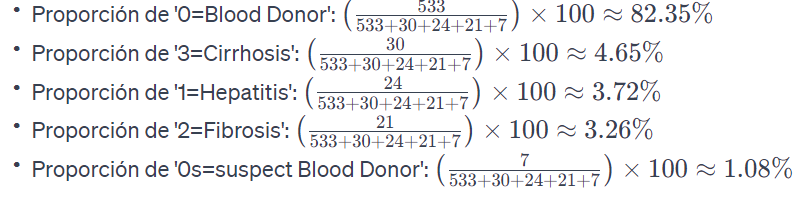


Podemos ver que la distribución no es balanceada pues los donantes de sangre contribuyen casi un 83%, mientrás que los demás valores de clasificación están entre el 1 y el 5 %. Este desbalanceo en la clasificación debemos tenerlo en cuenta en a la hora de evaluar los futuros modelos

Lo que podemos ver en los valores de clasificación es que no son valores numéricos, deberemos trasnsformar estos valores para poder trabajar con ellos. En el caso de la clasificación tenemos 5 valores,con respecto a los donantes de sangre, aunque los dos tipos de donante están relacionados, las donaciones son siempre analizadas , por lo que cuando se dispone de muchas muestras positivas como es el caso y pocos sospechosos directamente se descarta este segundo

In [7]:
label_encoder = LabelEncoder()

# Aplicamos Label Encoding a la columna 'Category'
df['Category'] = label_encoder.fit_transform(df['Category'])

# Mostramos los primeros valores
df.head()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,0,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,2,0,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,3,0,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,4,0,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,5,0,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


Con respecto a las donaciones de sangre en España, esta prohibido la donación  de sangre a los menores de 18 años y a los mayores de 65, además de tener que pesar más de 50 kilos, al no disponer de peso en estos datos, nos centraremos en comprobar el número de donantes que incumplen esta norma en la edad y **eliminar dichas muestras**, ya que pueden "contaminar los resultados"

In [8]:
max_age = df['Age'].max()
min_age = df['Age'].min()

# Imprimir los resultados
print(f'Máximo Age: {max_age}')
print(f'Mínimo Age: {min_age}')


# Contar cuántos donantes tienen más de 65 años
over_65 = ((df['Age'] > 65) & (df['Category'] == 0)).sum()

# Imprimir el resultado
print(f'Número de donantes con más de 65 años: {over_65}')


Máximo Age: 77
Mínimo Age: 19
Número de donantes con más de 65 años: 17


Como podemos ver aquí, tenemos 17 donantes mayores de la edad máxima, por lo que estas muestras no nos interesan, vamos a proceder para estos casos a la **Eliminación de instancias**

In [9]:
# Eliminar filas con clasificación '0=Blood Donor' o edad mayor de 65
df= df[~((df['Category'] == '0=Blood Donor') & (df['Age'] > 65))]

Vamos ahora a transformar el atributo edad, los agruparemos en 4 grupos que representarán la edad.

    * Joven(1): Entre 1-29 años
    * Adulto Joven(2): Entre 30-39 años
    * Adulto(3): Entre  40 y 49 años
    * Adulto mayor(4): Más de 50 años

Para este caso queremos que exista una correlación entre los valores, ya que conforma aumenta el valor indica un grupo de la población de edad más adulta por lo que no usaremos One-hot encoding y los agruparemos.

In [10]:
df['Age'] = pd.cut(x=df['Age'], bins=[1, 29, 39, 49, 100], labels=[1, 2, 3, 4])

Podemos ver el resultado de la conversión llamando simplemente al conjunto

In [11]:
df.tail()

,Unnamed: 0,Category,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
610,611,4,4,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,612,4,4,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,613,4,4,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0
613,614,4,3,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0
614,615,4,4,f,36.0,NaN,100.0,80.0,12.0,9.07,5.30,67.0,34.0,68.0


Ahora para el campo sexo vamos a realizar una codificación one hot, ya que es de tipo categórico, crearemos dos nuevos campos (sex_f y sex_m) y eliminaremos la característica inicial del sexo, esto en el pandas dataframe puede hacerse metiante el método **replace** indicando los cambios

In [12]:
df= pd.get_dummies(df, columns=['Sex', ])
df['Sex_f'].replace((True,False),(1,0),inplace=True)
df['Sex_m'].replace((True,False),(1,0),inplace=True)


In [13]:
df

,Unnamed: 0,Category,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT,Sex_f,Sex_m
0,1,0,2,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0,0,1
1,2,0,2,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5,0,1
2,3,0,2,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3,0,1
3,4,0,2,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7,0,1
4,5,0,2,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,611,4,4,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5,1,0
611,612,4,4,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3,1,0
612,613,4,4,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82.0,1,0
613,614,4,3,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71.0,1,0


Como podemos comprobar en el sumatorio, nuestro conjunto dispone de valores de atributos sin valor, por lo que deberemos tratar estos casos, una alternativa para casos menores sería la eliminación de esas muestras, pero como ya hemos realizado esa transformación y tenemos poca distribución de los valores de clasificación vamos a optar por rellenar esos valores

In [14]:
df.isnull().sum()

Unnamed: 0     0
Category       0
Age            0
ALB            1
ALP           18
ALT            1
AST            0
BIL            0
CHE            0
CHOL          10
CREA           0
GGT            0
PROT           1
Sex_f          0
Sex_m          0
dtype: int64

Para rellenar los valores ausentes que nos quedan al ser valores numéricos, tenemos dos opciones la media o la mediana, ya que la moda se usa para valores categóricos. 

La forma más sencilla de realizarla en el dataframe es llamando al método **fillna** especificandole la columna y la transformación a realizar (en nuestro caso rellenar los valores ausentes con la media o la mediana).

Para aplicar de manera más sencilla estas conversiones me he creado un pequeño método en el que le paso un conjunto de campos y la transformación correspondiente 

In [15]:
df_mean = df.copy(deep=True)
df_mean['ALT'].fillna(df_mean['ALT'].mean(), inplace=True)

In [16]:
def rellena_vacios(df, columns, method='mean'):
    df_f = df.copy(deep=True)
    for column in columns:
        if method == 'mean':
            fill_value = df_f[column].mean()
        elif method == 'median':
            fill_value = df_f[column].median()
        else:
            raise ValueError("Error, compruebe los valores'")
        
        df_f[column].fillna(fill_value, inplace=True)
    
    return df_f

In [17]:
columns = ['ALB','ALP','ALT', 'CHOL','PROT']

df_f_media = rellena_vacios(df, columns, method='mean')

Podemos comprobar facilmente que hemos eliminado del conjunto todos los valores vacios gracias a nuestro método

In [18]:
df_f_media.isnull().sum()

Unnamed: 0    0
Category      0
Age           0
ALB           0
ALP           0
ALT           0
AST           0
BIL           0
CHE           0
CHOL          0
CREA          0
GGT           0
PROT          0
Sex_f         0
Sex_m         0
dtype: int64

Si quisieramos realizar la media sería tan sencillo como cambiar el tipo de method a usar , en esta situación usar la media(median)

In [19]:
columns = ['ALB','ALP','ALT', 'CHOL','PROT']

df_f_mediana = rellena_vacios(df, columns, method='median')

Una vez tenemos todos los datos, vamos a realizar transformaciones para poder trabajar mejor con el conjunto ya que algunos valores tienen números muy dispares y pueden provocar picos y confundir al modelo.

He normalizado todos los valores númericos que quedaban por tratar a excepción del campo coresterol que lo he estandarizado, al resto de columnas se les hace una transformación que no hace nada ya que columntransfer cambia si no el orden de los valores

In [20]:
scaler = MinMaxScaler()
standardizer = StandardScaler()

# Crear el ColumnTransformer para todos los campos con el fin de mantener el orden  al hacer transformaciones
ct = ColumnTransformer(
    transformers=[
        ("original1", 'passthrough', ['Unnamed: 0', 'Category', 'Age']),
        ('normalize', scaler, ['ALB', 'ALP', 'ALT', 'AST', 'BIL', 'CHE']),
        ('standardize', standardizer, ['CHOL']),  
        ('normalize2', scaler, ['CREA','GGT', 'PROT']),
        ("original2", 'passthrough', ['Sex_f', 'Sex_m']),
    ],
    remainder='passthrough'
)

# Aplicamos el ct a los datos
X_transformed = ct.fit_transform(df_f_media)

Guardamos los nombres de las características en una variable

In [21]:
feature_names = df_f_media.columns

# Convertir a una lista si es necesario
feature_list = list(feature_names)
feature_list.pop(1)

df = pd.DataFrame(df_f_mediana)

# Extraer características (X) y etiquetas (y) que estan en la axis 1
X = df.drop('Category', axis=1).values
y = df['Category'].values

In [22]:
# Especificamos el índice de la columna/s para extraer, en nuestro caso la clasificacion
index_column = 1

# Extraer la columna y creamos el conjunto y
y = X_transformed[:, index_column]
X = np.delete(X_transformed, index_column, axis=1)
print(X.shape)
len(feature_list)

(615, 14)


14

Creamos un conjunto de entrenamiento y prueba con train test split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.25, random_state=2)

### Reducción recursiva de características

La eliminación recursiva de características es una técnica de selección de características que se basa en eliminar caracterísicas para comprobar si el rendimiento mejora, con el fin de detectar características inservibles para su eliminación.

Podemos comprobar rapidamente nuestro rendimiento haciendo uso de SVC,obteniendo un 91% de acierto sobre el proprio conjunto de entrenamiento

In [24]:
modelo0 = LinearSVC().fit(X_train,y_train)
print(modelo0.score(X_train,y_train))

0.8763557483731019


Una aproximación mas manual es eliminar nosotros mismos las características, vamos a comprobar el rendimiento si no tenemos en cuenta la característica 0, la cual es un identificador, el cual obviamente no nos da ninguna información y puede detectar relaciones que no queremos que aprenda, vamos a ver como se comporta el modelo

In [25]:
X1A_data = [[x[1],x[2],x[3],x[4],x[5],x[6],x[7],x[8],x[9],x[10],x[11],x[12],x[13]] for x in X_transformed]

modelo1A = LinearSVC().fit(X1A_data, y)
print("Media sin la característica 0")
print(modelo1A.score(X1A_data,y))


Media sin la característica 0
0.9804878048780488


Vemos que el rendimiento mejora algo, pero hay otras formas mas automatizadas de conseguirlo, que es mediante métodos ya construidos como es el caso de **RFE**, en el que le indicamos el número de características a eliminar.

También con **ranking_** podemos ordenar el orden de las características según se relevancia , en este caso podemos ver que también descarta la primera característica , seguida del campo del colesterol

In [26]:
modelo1 = LinearSVC()

selector = RFE(modelo1,n_features_to_select=1,step=1)

selector.fit(X_transformed,y)

RFE(estimator=LinearSVC(), n_features_to_select=1)

In [27]:
selector.support_

array([False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False])

el colesterol

In [28]:
selector.ranking_

array([15,  4, 13,  6,  2,  5, 12, 10,  1, 14, 11,  9,  3,  8,  7])

### Reducción de características basada en modelos

Scikit-learn también tiene un métodoque selecciona las características basada en distintos modelos (Randomforest,svc).Vamos a aplicar randomForest y comprobar las características que considera más importantes.


In [29]:
select1 = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))

select1.fit(X_transformed,y)

SelectFromModel(estimator=RandomForestClassifier(random_state=42))

In [30]:
select1.get_support()

array([ True,  True, False, False, False, False,  True, False, False,
       False, False, False, False, False, False])

En este caso sigue calificando el atributo colesterol como una variable no relevante, junto al ID que también lo marca.

### Análisis de componentes principales

Como último apartado de esta parte vamos a realizar un análisis de componentes principales, en el que le pasaremos las 15 componentes y nos devolverá gracias a **explained_variance_** que nos devolvera un array con la varianza de las características. El identificador es el que mayor vairanza presenta(pues es un incremental) y los sexos codificados en one hot los que menos

In [31]:
pca = PCA(n_components=14)

pca.fit(X_transformed)

X_pca = pca.transform(X_transformed)

In [32]:
pca.explained_variance_

array([3.15706544e+04, 1.27761274e+00, 7.05582657e-01, 5.35213610e-01,
       1.09525376e-01, 2.03533140e-02, 1.15257673e-02, 9.26135482e-03,
       5.32821525e-03, 4.61144401e-03, 4.19389402e-03, 3.39102259e-03,
       2.14075727e-03, 1.68979327e-03])

Tras todas estas comprobaciones queda claro que las componentes del ID y el colesterol(CHOL) son las más irrelevantes y las que debemos eliminar , para ello eliminamos sus columnas y también del listado de nombre borramos sus campos

Eliminamos el colesterol y el ID(evidentemente) pues hemos visto que son las características mas irrelevantes

In [33]:
feature_list.pop(0)
X = np.delete(X, [0,8], axis=1)
print(X.shape)
# hemos eliminado un elemento por que el índice decrece en uno
feature_list.pop(7)
len(feature_list)

(615, 12)


12

Finalmente nos quedamos con nuestro conjunto tratado quedaría en las siguientes variables, y obteniendo un rendimiento de un 98%. Por lo que ya podemos separar el conjunto de entrenamiento y prueba para las futuras transformaciones pero pasando antes por el apartado de Over/under sampling

In [34]:
X
y
feature_list

['Age',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CREA',
 'GGT',
 'PROT',
 'Sex_f',
 'Sex_m']

In [35]:
modelo1A = LinearSVC().fit(X, y)
print(modelo1A.score(X,y))

0.9252032520325203


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### OverSampling y Undersampling

Como hemos visto anteriormente el conjunto es muy muy irregular por lo que deberemos en el conjunto de entramiento arreglar esto, una opción que tenemos es usar **OverSampling y Undersampling** para reducir o aumentar los valores según la necesidad del conjunto


Podemos ver que las clases quedan de la siguiente manera

In [37]:
class_counts = Counter(y_train)

# Imprimir el recuento de cada clase
for label, count in class_counts.items():
    print(f"Clase {label}: {count} instancias")

Clase 0.0: 437 instancias
Clase 3.0: 15 instancias
Clase 4.0: 21 instancias
Clase 2.0: 15 instancias
Clase 1.0: 4 instancias


Vamos a empezar aplicanod UnderSampler para reducir levemente la clase mayoritaria que es la de donante de sangre, mientras conservamos la minoritaría.

Para ello usamos RandomSampler especificando los elementos a mantener, una vez hecho esto comprobamos si el rendimiento se ha resentido, pero podemos ver que ha mejorado minimamente 0.05%

In [38]:
# Aplicar RandomUnderSampler
sampling_strategy_minority = 4  # Mantener todas las instancias de la clase minoritaria (4 en este caso)
sampling_strategy_majority = 400  # Mantener 400 muestras del mayoritario

# Crear el objeto RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy={0: sampling_strategy_majority, 1: sampling_strategy_minority}, random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [39]:
modelo1A = LinearSVC().fit(X_resampled, y_resampled)
print(modelo1A.score(X_resampled,y_resampled))

0.9296703296703297


Comprobamos que las transformaciones se han realizado correctamente

In [40]:
class_counts = Counter(y_resampled)

# Imprimir el recuento de cada clase
for label, count in class_counts.items():
    print(f"Clase {label}: {count} instancias")

Clase 0.0: 400 instancias
Clase 1.0: 4 instancias
Clase 2.0: 15 instancias
Clase 3.0: 15 instancias
Clase 4.0: 21 instancias


In [42]:
X_train
y_train
X_test
y_test
feature_list


['Age',
 'ALB',
 'ALP',
 'ALT',
 'AST',
 'BIL',
 'CHE',
 'CREA',
 'GGT',
 'PROT',
 'Sex_f',
 'Sex_m']

### 

 # <center> 3º  Construcción de modelos de decisión </center>

Una vez tenemos el conjunto ya preparado , vamos a proceder a la construcción de modelos, para cada modelo especificaremos un sub-apartado en que veremos por una parte la creación del modelo en sí, seguido de algunos ajustes de los parámetros  para influir el rendimiento, y finalmente un análisis de los obtenidos obtenidos para el modelo. 

## KNN

El primer modelo que vamos a ver es el de los vecinos más cercanos (K-nearest neighbour). Es un algoritmo de aprendizaje  utilizado para problemas de clasificación y regresión. La idea principal del algoritmo es clasificar un ejemplo basándose en las  k clases o valores de los puntos de datos más cercanos a él.

In [43]:
from sklearn.neighbors import KNeighborsClassifier
knn1 = KNeighborsClassifier()

In [44]:
knn1.fit(X_train,y_train)

KNeighborsClassifier()

In [45]:
knn1.score(X_test,y_test)

0.8130081300813008

Como podemos ver, obtenemos un buen rendimiento usando este algoritmo, pero podríamos ajustar distintos valores para refinar el modelo.

Algunos valores que podemos tocar son:

   * n_neighbors(hiperparámetro): Que se refiere al nº de vecinos que tendrá en cuenta cada ejemplo del conjunto para la clasificación
   * p: Indica la distancia que vamos a usar, puede ser **Minkowski o Manhatan**
   * weights: Para ponderar los valores de los mejores vecinos, podríamos usar **uniform** que le da misma importancia a los vecinos o **distance**, que usa como su nombre usa la distancia para valorar como mejor o peor un vecino  


In [46]:
knn2 = KNeighborsClassifier(n_neighbors=1,p=2,weights='distance')

In [47]:
knn2.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1, weights='distance')

In [48]:
knn2.score(X_test,y_test)

0.8373983739837398

Vemos que añadiendo un nº de vecinos y especificando que tenga en cuenta que los vecinos en función de la distancia hemos conseguido mejorar el rendimiento, pero para comprobar el mejor número de estos parametros he reutilizado un método que se nos ha pedido para las entregas individuales modificándolo levemente para comprobar de forma iteratíva los mejores valores de estos parámetros

In [49]:
# T_k es el numero maximo de vecinos
# Tengo que devolver maxK (vecinos que maximiza el rendimiento) y maxS (el rendimiento más alto)
def kNNBestKScore(T_k,X_train,y_train,X_test,y_test):
    
    #Declaro las variables del resultado inicializadas a 0
    maxK=0;
    maxS=0;
    bestP=1;
    
    #Recorro los valores desde 1 hasta el valor de T_k, que es el número máximo de vecinos
    for i in range(1, T_k + 1):
        
        for j in range(1,2):
            # definimos el clasificador  para cada valor de i
            knn1 = KNeighborsClassifier(n_neighbors=i,p=j,weights='distance')

            # entrenamos
            knn1.fit(X_train,y_train)

            # calculamos el rendimiento para el conjunto de prueba
            score = knn1.score(X_test,y_test)

            # comparamos, si es mejor lo guardamos en la variable
            if(score > maxS):
                maxS= score;
                maxK=i;
                bestP=j
    
    #Imprimimos por pantalla para dar mas resultado
    print("El número de vecinos que maximiza el rendimiento es " + str(maxK) +" La distancia es " + str(bestP) + "  y cuyo rendimiento da " + str(maxS))
    
    return maxK,maxS

In [50]:
kNNBestKScore(10,X_train,y_train,X_test,y_test)

El número de vecinos que maximiza el rendimiento es 1 La distancia es 1  y cuyo rendimiento da 0.8373983739837398


(1, 0.8373983739837398)

Tras ejecutar el método anterior hemos llegado a la conclusión de que el mejor rendimiento que podemos obtener con K-NN para los parámetros que hemos modificado ha sido de un **83.7 %**. 

Este rendimiento lo hemos obtenido usando:

* **p=1**  ,  Es para especificar el tipo de distancia, en nuestro caso con p=1 ,hemos usado la Manhattan
* **Nº vecinos = 1** : Estamos teniendo en cuenta solo el vecino más cercano para realizar la clasificación, un solo vecino puede ser bueno en la clasificación pero hace que el modelo sea más sensible al ruido , ya que solo se tiene en cuenta ese valor
* **weights: distance** : Es decir, estamos definiendo los pesos en función de la distancia, dando a los más cercanos mayor impacto en la clasificación 


## Árboles de decisión

* ### dispersión

El grado de dispersión o impureza en árboles se refiere a la medida de cuánto los datos en un nodo son mezclados o impuros en términos de sus clases.

Para la dispersión podemos usar o bien **Gini** (que es el valor por defecto ) que calcula la distribución de la clasificación o **Entropy** para tener en cuenta la ganancia de información

Vamos a probar ambos casos sin añadir ningún tipo de transformación adicional para ver en cual el rendimiento es mejor

In [51]:
from sklearn.tree import DecisionTreeClassifier

# gini
tree1_clf = DecisionTreeClassifier()
# entropia
tree2_clf = DecisionTreeClassifier(criterion='entropy')

In [52]:
tree1_clf.fit(X_train,y_train)

tree2_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [53]:
print("Rendimiento en el conjunto de entrenamiento con Gini: ",tree1_clf.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba con Gini: ",tree1_clf.score(X_test,y_test))

print("Rendimiento en el conjunto de entrenamiento con entropy: ",tree2_clf.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba con entropy: ",tree2_clf.score(X_test,y_test))

Rendimiento en el conjunto de entrenamiento con Gini:  1.0
Rendimiento en el conjunto de prueba con Gini:  0.8211382113821138
Rendimiento en el conjunto de entrenamiento con entropy:  1.0
Rendimiento en el conjunto de prueba con entropy:  0.8373983739837398


Podemos ver que para ambos casos el rendimiento es casi perfecto en entrenamiento, lo que me da sospechas de que hay algo de sobreajuste, aun más si miramos el valor en el conjunto de prueba, por lo que vamos a intentar "controlar" esto en el arbol generado

* ###  Poda a priori

El primero de los casos es usar la prepoda, que es definir determinadas restricciones a la hora de crear el arbol para evitar que se sobreajuste o que escale demasiado, hay muchos valores que podemos tener en cuenta para controlar el arbol, pero yo he decidido centrar en las siguientes cuatro:

* **max_depth** : Este parámetro controla la profundidad del árbol. Limitar la profundidad del árbol ayuda a prevenir el sobreajuste.
* **min_samples_leaf** : Especifica el número mínimo de muestras requeridas para ser una hoja. Si el número de muestras en un nodo es menor que este valor, el nodo no se dividirá más. Limitando este valor evitamos crear hojas con muy pocos valores
* **min_samples_split** : determina el número mínimo de muestras requeridas para dividir un nodo interno en vez de hojas, que es el caos anterior
* **max_leaf_nodes** : especifica un nº máximo de hojas en el que el árbol parará de crecer, aunque siga mejorando, así evitamos tener un modelo complejo y con un coste computacional alto


Vamos a probar a buscar el mejor árbol posible en función de estos valores y iterando sobre la profundidad del árbol

In [54]:
best_depth = 0
best_score = 0
for i in range(1,5):
    tree_clf = DecisionTreeClassifier(random_state=8,max_depth=i, min_samples_leaf=1,min_samples_split=5, max_leaf_nodes=5)
    tree_clf.fit(X_train,y_train)
    score = tree_clf.score(X_test,y_test)
    if score >= best_score:
        best_score = score
        best_depth = i
print("Mejor Profundidad: ",best_depth," - Score: ",best_score)

Mejor Profundidad:  4  - Score:  0.8455284552845529


In [55]:
tree3A_clf = DecisionTreeClassifier(random_state=8,max_depth=4, min_samples_leaf=5,min_samples_split=5, max_leaf_nodes=5)

tree3A_clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, max_leaf_nodes=5, min_samples_leaf=5,
                       min_samples_split=5, random_state=8)

In [56]:

from matplotlib import pyplot as plt
from sklearn.tree import export_graphviz

export_graphviz(
    tree1_clf,
    out_file="tree1.dot",
    feature_names=feature_list,
    rounded=True,
    filled=True)


def show_tree(tree_clf,features):
    export_graphviz(
        tree_clf,
        out_file="tree_clf.dot",
        feature_names=feature_list,
        rounded=True,
        filled=True)
    !dot -Tpng tree_clf.dot -o tree_clf.png
    plt.clf()
    dpi = 70
    image = plt.imread("tree_clf.png")
    height, width, depth = image.shape
    figsize = width / float(dpi), height / float(dpi)
    plt.figure(figsize=figsize).add_axes([0, 0, 1, 1])
    plt.axis('off')
    plt.imshow(image)
    plt.show()
    


<Figure size 800x550 with 0 Axes>

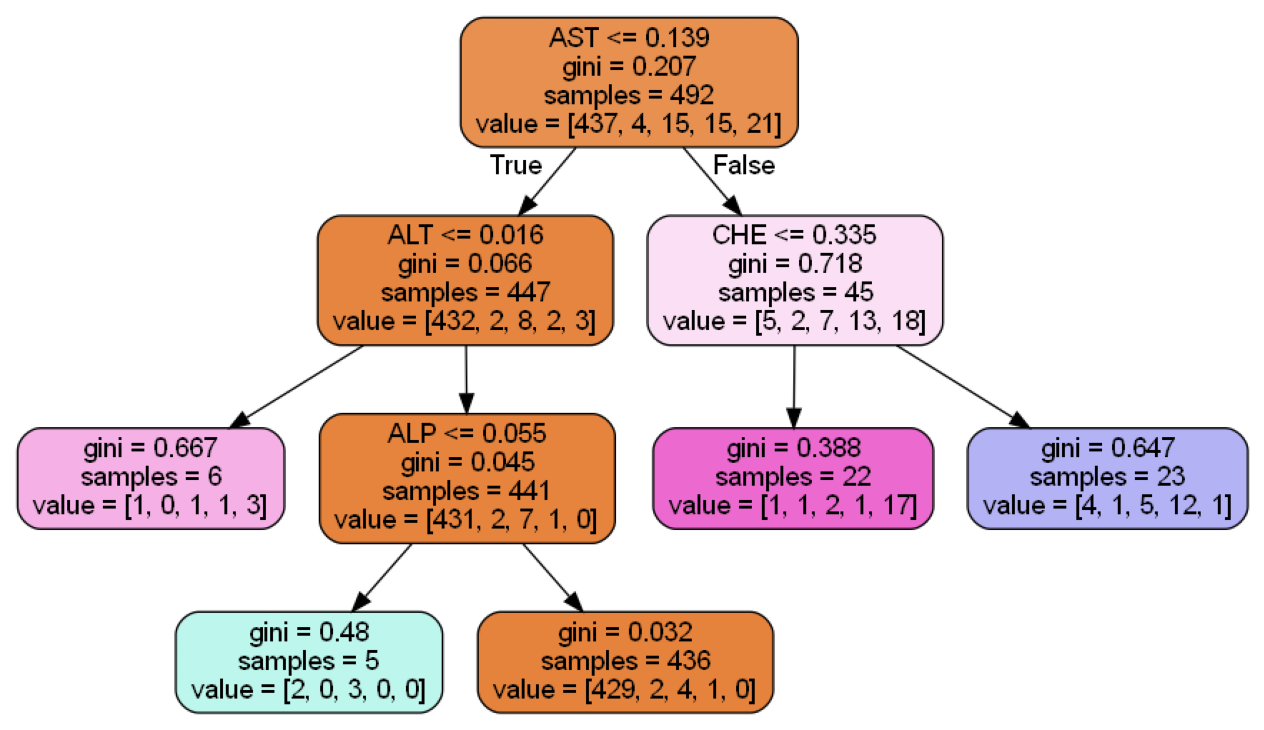

In [57]:
show_tree(tree3A_clf,feature_list)

* ###  Postpoda

Otra alternativa una vez tenemos el árbol es realizar transformaciones con el fin de mejorar el rendimiento, uno ejemplo sería la de **podar** el árbol comprobando si mejora el rendimiento

In [58]:
from copy import deepcopy

tree3AB_clf = deepcopy(tree3A_clf)

In [59]:
tree3AB_clf.tree_.children_left[1] = -1
tree3AB_clf.tree_.children_right[1] = -1
tree3AB_clf.tree_.feature[1] = -2

In [60]:
print("Rendimiento en el conjunto de entrenamiento: ",tree3A_clf.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",tree3A_clf.score(X_test,y_test))


Rendimiento en el conjunto de entrenamiento:  0.943089430894309
Rendimiento en el conjunto de prueba:  0.8617886178861789


<Figure size 800x550 with 0 Axes>

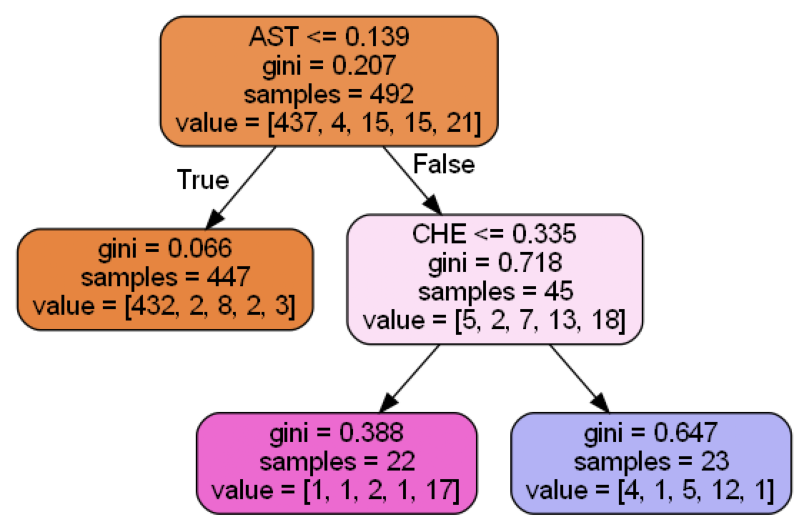

In [61]:
show_tree(tree3AB_clf,feature_list)

Con estos cambios hemos conseguido reducir la complejidad del arbol y mejorar levemente el rendimiento de prueba, reduciendo así un poco el sobreajuste que padecia el modelo

Podemos ver que la dimensión del arbol se ha reducido trás todos estos cambios, he decidido eliminar los nodos hijos del nodo 1, ya que su índice de gini es muy pequeño y se ramificaba aumentando la complejidad para muy pocas clasificaciones, en cambio podemos ver que cuando el primer valor es false, se puede observar que el indice de gini es más grande, hay muchas posibles clasificiones, en este apartado habría sido quizás mejor idea dejar que el árbol fuese más profundo para que puede diferenciar mejores estos valores, ya que las hojas del final dan poca información de la posible clasificación

## Ensemble learning con árboles

* ### Random forest

Como hemos visto en los modelos creados anteriormente se puede ver un sobreajuste en el entrenamiento (El rendimiento de entrenamiento es mucho mayor que el de prueba). Para reducir este sobreajuste en lod árboles podemos emplear randomForest, que consiste en crear múltiples árboles independientes y combinar sus predicciones

In [62]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=10,max_depth=10)

In [63]:
forest.fit(X_train,y_train)

RandomForestClassifier(max_depth=10, n_estimators=10)

In [64]:
forest.fit(X_train,y_train)

print("Rendimiento en el conjunto de entrenamiento: ",forest.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",forest.score(X_test,y_test))

Rendimiento en el conjunto de entrenamiento:  0.9939024390243902
Rendimiento en el conjunto de prueba:  0.8455284552845529


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Definir el clasificador RandomForest
rf_classifier = RandomForestClassifier()

# Definir la búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100,150, 200],
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2,3,5],
    'min_samples_leaf': [1, 2, 4, 5]
}

# Configurar la búsqueda con validación cruzada
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo con la búsqueda en cuadrícula
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el mejor modelo entrenado
best_rf_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
predictions = best_rf_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy en el conjunto de prueba: {accuracy}")


Mejores parámetros: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy en el conjunto de prueba: 0.8699186991869918


En el caso de randomForest hemos obtenido un mejor rendimiento con una profundidad de 7 y un valor mínimo para crear hojas de 1, esto puede deberse a que como no hemos realizado oversampling en test, los valores de clasificación de las minorías son muy bajas, por lo que necesita un valor mínimo para crear hojas bajo, en consecuencia, también tenemos el nº de muestras para crear nodos intermedios, nos encontramos aquí dos casos, como tenemos un valor mayoritario muy alto el árbol rapidamente tiene nodos donde la clasificación de una clase casi es del 100% mientrás que en otras con muy pocos valores sigue ramificandose, pues tiene pocas muestras pero de múltiples clasificaciones

* ### Gradient Boosting


In [66]:
from sklearn.ensemble import GradientBoostingClassifier

ensemble = GradientBoostingClassifier(n_estimators=10)

In [67]:
ensemble.fit(X_train,y_train)

GradientBoostingClassifier(n_estimators=10)

In [68]:
ensemble = GradientBoostingClassifier(n_estimators=10,max_depth=4)

ensemble.fit(X_train,y_train)

print("Rendimiento en el conjunto de entrenamiento: ",ensemble.score(X_train,y_train))
print("Rendimiento en el conjunto de prueba: ",ensemble.score(X_test,y_test))

Rendimiento en el conjunto de entrenamiento:  0.9979674796747967
Rendimiento en el conjunto de prueba:  0.8373983739837398


In [69]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Definimos el clasificador Gradient Boosting
gb_classifier = GradientBoostingClassifier()

# Definimos la búsqueda de hiperparámetros
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

# Configurar la búsqueda  con validación cruzada
grid_search = GridSearchCV(estimator=gb_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Entrenar el modelo 
grid_search.fit(X_train, y_train)

# Imprimir los mejores parámetros encontrados
print("Mejores parámetros:", grid_search.best_params_)

# Obtener el mejor modelo entrenado
best_gb_model = grid_search.best_estimator_

# Realizar predicciones en el conjunto de prueba
predictions = best_gb_model.predict(X_test)

# Evaluar el rendimiento del modelo
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy en el conjunto de prueba: {accuracy}")


Mejores parámetros: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}
Accuracy en el conjunto de prueba: 0.8780487804878049


Podemos ver que los mejores valores parámetros utilizando GradientBoosting es sobre un conjunto de 50 árboles, con una profundidad 5, como vimos en la creación del árbol de decisión anterior obtuvimos un valor similar en el tema de la profundidad, esto se puede deber a que en la ramificación en esta profundidad los valores de clasificación están ya muy definidos. 

Por último pero no menos importante tenemos el learning rate: este valor no es otra cosa que la tasa de aprendizaje , es decir, la contribución de cada árbol al modelo final, un lr más alto hace que el modelo se jauste más rapido a los datos,un valor muy alto puede hacer que se sobreajuste en el modelo , pero en nuestro caso con un valor de 0,2 conseguimos mejorar el rendmiento en test a casi un **88%**

## Modelos lineales

* ### Regresión logística

In [70]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression().fit(X_train, y_train)

print("Rendimiento sobre el conjunto de entrenamiento: {:.2f}".format(lr.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de test: {:.2f}".format(lr.score(X_test, y_test)))

Rendimiento sobre el conjunto de entrenamiento: 0.65
Rendimiento sobre el conjunto de test: 0.41


In [71]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=100, max_iter=1000).fit(X_train, y_train)
print("Rendimiento sobre entrenamiento: {:.3f}".format(logreg.score(X_train, y_train)))
print("Rendimiento sobre el conjunto de prueba: {:.3f}".format(logreg.score(X_test, y_test)))

Rendimiento sobre entrenamiento: 0.949
Rendimiento sobre el conjunto de prueba: 0.878


C: Este valor indica la intensidad de la regularización. Cuanto mas alto este valor menor será la regularización 

Podemos ver que con un valor estandar de C (C=1) el modelo obtiene un rendimiento bastante malo (**41%**) , en comparación a usar un valor de C = 100 que llegamos a un **88%**. esto seguramente se deba a que reduciendo la intensidad de la regularización el modelo puede adaptarse mejor a los datos del conjunto, ya que las penalizaciones son menores y el modelo es más flexible



* ###  Máquinas de vectores soporte

In [72]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, y_train)

print("Rendimiento sobre conjunto de entrenamiento: {:.3f}".format(svc.score(X_train, y_train)))
print("Rendimiento sobre conjunto de prueba: {:.3f}".format(svc.score(X_test, y_test)))

Rendimiento sobre conjunto de entrenamiento: 0.890
Rendimiento sobre conjunto de prueba: 0.789


In [73]:
svc = SVC(kernel='rbf', C=100).fit(X, y)
svc.fit(X_train, y_train)

print("Rendimiento sobre conjunto de entrenamiento: {:.3f}".format(
        svc.score(X_train, y_train)))
print("Rendimiento sobre conjunto de prueba: {:.3f}".format(svc.score(X_test, y_test)))

Rendimiento sobre conjunto de entrenamiento: 0.959
Rendimiento sobre conjunto de prueba: 0.862


Podemos  ver que le rendimiento mejora con un valor mayor valor de C:

Lo que podemos observar aquí al mejorar el rendimiento con un valor de C=100 es que el modelo mejora cuando la regularización es menor, provocando así que se adapte mejor al test pero a cambio de tener un modelo más complejo

## Redes neuronales

* ###  Redes neuronales multicapa en scikit-learn

In [74]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(solver="lbfgs",random_state=42,max_iter=1000)
mlp.fit(X_train, y_train)

print("Rendimiento en entenamiento: {:.2f}".format(mlp.score(X_train, y_train)))
print("Rendimiento en el conjunto de prueba: {:.2f}".format(mlp.score(X_test, y_test)))

Rendimiento en entenamiento: 1.00
Rendimiento en el conjunto de prueba: 0.86


He usado lbfgs ya que como hemos visto en las prácticas funciona  bien con conjuntos de datos pequeños y mediamos.

Podemos ver que como nos ha pasado en otros modelos, sin un estudio en profundidad el modelo se sobreajuste, obteniendo en entrenamiento un 100% , aunque en este caso mejora también el rendimiento en test

* ###  Redes neuronales multicapa en keras

In [75]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[12]))
model.add(keras.layers.Dense(128, activation="relu"))
model.add(keras.layers.Dense(64, activation="relu"))
model.add(keras.layers.Dense(5, activation="softmax"))


In [76]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=["accuracy"])


history = model.fit(X_train, y_train, epochs=5,validation_data=(X_test, y_test))


Epoch 1/5


16/16 [==============================] - 1s 15ms/step - loss: 1.1483 - accuracy: 0.6809 - val_loss: 0.9400 - val_accuracy: 0.7805
Epoch 2/5
16/16 [==============================] - 0s 3ms/step - loss: 0.5940 - accuracy: 0.8882 - val_loss: 0.9352 - val_accuracy: 0.7805
Epoch 3/5
16/16 [==============================] - 0s 4ms/step - loss: 0.5157 - accuracy: 0.8882 - val_loss: 0.9426 - val_accuracy: 0.7805
Epoch 4/5
16/16 [==============================] - 0s 4ms/step - loss: 0.4939 - accuracy: 0.8882 - val_loss: 0.8919 - val_accuracy: 0.7805
Epoch 5/5
16/16 [==============================] - 0s 3ms/step - loss: 0.4763 - accuracy: 0.8882 - val_loss: 0.8527 - val_accuracy: 0.7805


Para la construción de la red, he optado por intercalar un par de capas dense con 128 y 64 neuronas con funciones de activación relu , en las capas intermedias suelen ser las que mejor funcionan ,otra opción podría haber sido usar sigmoid pero al ser multiclase el problema he usado relu, para la función de salida he usado softmax, es la mejor para problemas de clasificación múltiple como es el caso con 5 neuronas.

Podemos ver que el "accuracy" desde las primeras épocas crece prácticamente aunque hemos conseguido reducir al princpio la pérdida. el optimizador he usado Adam y sgd, pero me he decantado por Adam por mostrar una mejora leve en el rendmimiento en el conjunto, adam se adapta bien a tasas de aprendizaje mientrás mantiene las ventajas del descenso , y a consecuencia de esto hemos aumentado el rendimiento en test muy levemente

 # <center> 4º  Evaluación de modelos </center>

Procederemos ahora al apartado de evaluación de modelos, en este apartado lo que vamos a hacer es separar según el modelo, veremos:
* los mejores hiperparámetros para el modelo en cuestión.
* Crearemos la matriz de confusión y analizaremos el resultado
* Crearemos el informe de clasificación
* Finalmente analizaremos las curvas PR y ROC para ese modelo



## Construcción equilibrada de modelos

* ###  KNN

Calculos de los mejores hiperparámetros

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, StratifiedKFold

knn = KNeighborsClassifier()

param_grid = {'n_neighbors': [3, 5, 7],'weights': ['uniform', 'distance'],'p': [1, 2]}
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy',return_train_score=True)

grid_search.fit(X_train, y_train)

print("Mejor resultado (media) en validación cruzada: {:.2f}".format(grid_search.best_score_))
print("Mejor clasificador encontrado: {}", grid_search.best_estimator_)
print("Evaluación sobre el conjunto de test: {:.2f}".format(grid_search.score(X_test, y_test)))

best_knn_model = grid_search.best_estimator_

Mejor resultado (media) en validación cruzada: 0.92
Mejor clasificador encontrado: {} KNeighborsClassifier(n_neighbors=3, weights='distance')
Evaluación sobre el conjunto de test: 0.80


In [78]:
from sklearn.metrics import confusion_matrix
# Obtener y mostrar la matriz de confusión
y_pred = best_knn_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusión:")
print(conf_matrix)

from sklearn.metrics import classification_report

classification_rep = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(classification_rep)

Matriz de Confusión:
[[96  0  0  0  0]
 [ 3  0  0  0  0]
 [ 8  0  1  0  0]
 [ 6  0  0  0  0]
 [ 7  0  0  0  2]]
Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.80      1.00      0.89        96
         1.0       0.00      0.00      0.00         3
         2.0       1.00      0.11      0.20         9
         3.0       0.00      0.00      0.00         6
         4.0       1.00      0.22      0.36         9

    accuracy                           0.80       123
   macro avg       0.56      0.27      0.29       123
weighted avg       0.77      0.80      0.74       123



Vamos a analizar la matriz de confusión para el modelo KNN, como podemos ver la estructua de la matriz sigue la siguiente forma

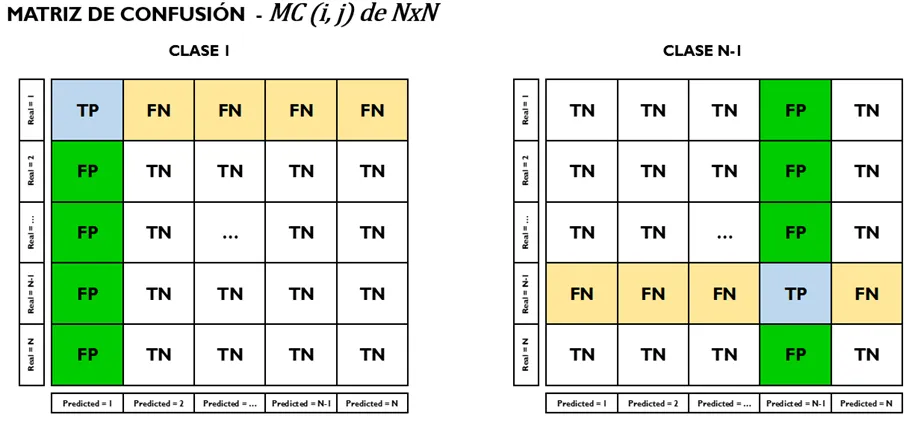 Matriz de N elementos Fuente :https://wbarriosb.medium.com/calculando-la-precisi%C3%B3n-en-un-modelo-de-clasificaci%C3%B3n-multiclase-224d96f52043



Podemos ver en la matriz que este modelo tiene problemas para diferenciar clasificaciones con respecto a la primera clase, recordemos que el conjunto poseía muchas mas clases de esta clasificación que el resto, el modelo clasifica mal las clases menos predominantes y las marca como falsos positivos, solo de la clase 3 y 5 clasifica bien algún valor pero la mayoria es erronea.

Pasamos ahora al informe de clasificación, en nuestro caso al ser un conjunto de detección de enfermedades prefiero usar como referencia una métrica que me indice cuantos falsos negativos tengo, pues en medicina estos valores tienen más importancia, pues la detección temprana de una enfermedad es importante , para ellos vamos a ver el valor recall.

Un valor recall  de 1 me indicaría que no tenemos falsos negativos, podemos ver que aunque considerando como clase positiva la primera clase obtenemos un 100%, en los demás casos el valor del recall es muy bajo, esto como ya hemos visto varias veces, está influido por el desequilibrio de clases, ya que por ejemplo en el caso de la clase 1, al disponer de solo 3 valores de clasificación, al fallar uno de ellos pierde una tercera parte de la precisión

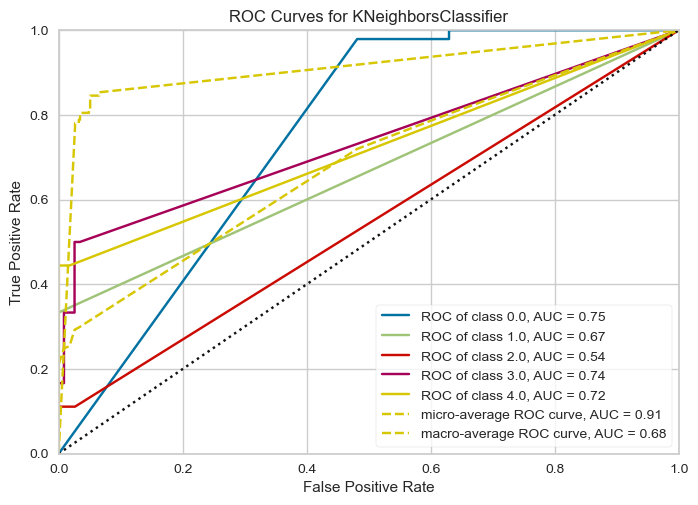

<Axes: title={'center': 'ROC Curves for KNeighborsClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [79]:
from yellowbrick.classifier import ROCAUC

# Inicializa y ajusta el visualizador de la curva ROC
roc_viz = ROCAUC(best_knn_model, classes=best_knn_model.classes_)
roc_viz.fit(X_train, y_train)
roc_viz.score(X_test, y_test)
roc_viz.show()

De esta curva ROC tenemos que comentar antes que nada, que al contrario que la PR, será mejor cuanto más cerca estemos de la esquina superior izquiera, es decir, empezamos en el 0,0 que será una situación donde todo lo clasifica como negativo y acabamos en 1,1 donde todo lo clasifica como positivo.

Podemos ver que la media de las curvas es bastante irregular conforme aumenta el ratio de TP , aumenta exponencialmente el de los falsos positivos, esto quiere indicarnos que pequeños cambios en el umbral está teninendo un efecto sginificativo en los falsos positivos

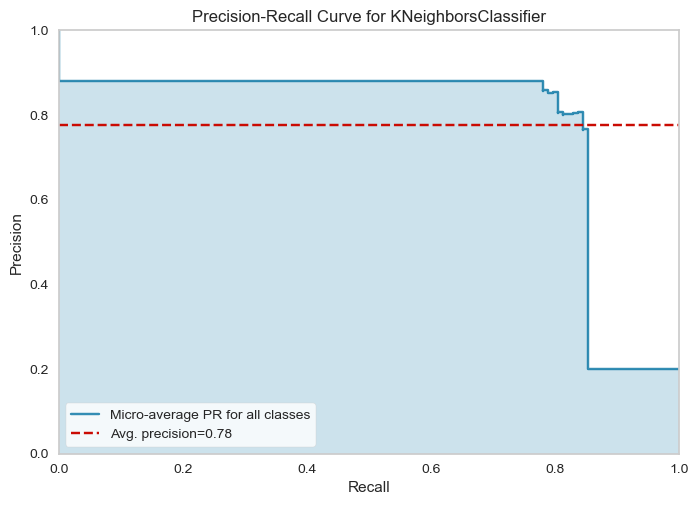

<Axes: title={'center': 'Precision-Recall Curve for KNeighborsClassifier'}, xlabel='Recall', ylabel='Precision'>

In [80]:
# Inicializa y ajusta el visualizador de la curva PR
viz = PrecisionRecallCurve(best_knn_model, classes=best_knn_model.classes_) # para ver por clase per_class=True
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

La curva Precisión Recall nos indica conforme variamos el umbral  como va variando esto dos valores.
Es decir al principio de la curva tenemos un recall 0 pero una precision de 100
En el otro extremo tenemos un recall de 1 pero una precisión cada vezmás baja nos encontramos en una situación donde casi todo se clasifica como positivo.

Una buena curva es cuanto mas arriba a la derecha se encuentre, es decir, que su precision y recall sean lo más cercano posible a 1. En nuestro caso hemos hablado de centrarnos en el recall pero no podemos sacrificar la precisión pues vemos que al final de la curva , el recall aumenta pero perdemos muchisima precisión, quizás un valor alrededor de un 80-85 del recall donde la precisión también oscila el 80% sería el mejor caso ya que al aumentar el recall la precisión cae drasticamente


* ###  Árboles

In [81]:
tree_classifier = DecisionTreeClassifier()

param_grid = {
    'max_depth': [3, 5, 7,10],
    'min_samples_split': [2,3,5],
    'min_samples_leaf': [1, 2, 4, 5]
}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=tree_classifier, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Imprimir los resultados
print("Mejor resultado (media) en validación cruzada: {:.2f}".format(grid_search.best_score_))
print("Mejor clasificador encontrado: {}", grid_search.best_estimator_)
print("Evaluación sobre el conjunto de test: {:.2f}".format(grid_search.score(X_test, y_test)))

# Obtener el mejor modelo de árbol de decisión
best_tree_model = grid_search.best_estimator_

Mejor resultado (media) en validación cruzada: 0.92
Mejor clasificador encontrado: {} DecisionTreeClassifier(max_depth=10)
Evaluación sobre el conjunto de test: 0.83


In [82]:
# Obtener y mostrar la matriz de confusión
y_pred = best_tree_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión:")
print(conf_matrix)


classification_rep = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(classification_rep)

Matriz de Confusión:
[[94  0  2  0  0]
 [ 2  1  0  0  0]
 [ 3  0  4  1  1]
 [ 4  0  1  1  0]
 [ 3  0  4  0  2]]
Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.89      0.98      0.93        96
         1.0       1.00      0.33      0.50         3
         2.0       0.36      0.44      0.40         9
         3.0       0.50      0.17      0.25         6
         4.0       0.67      0.22      0.33         9

    accuracy                           0.83       123
   macro avg       0.68      0.43      0.48       123
weighted avg       0.82      0.83      0.80       123



Para este modelo usando árboles vemos  en la matriz que mejora la clasificación de valores de forma correcta, en este caso la clasificación de la clase 1 ha pasado de knn (0%) al 100% para este caso. En las demás clases podemos ver también una mejora aunque en algunos valores sigue presentando un recall bajo. en este caso en comparación al anterior presenta falsos positivos para las clases menos frecuentes , y el valor del recall es mejor

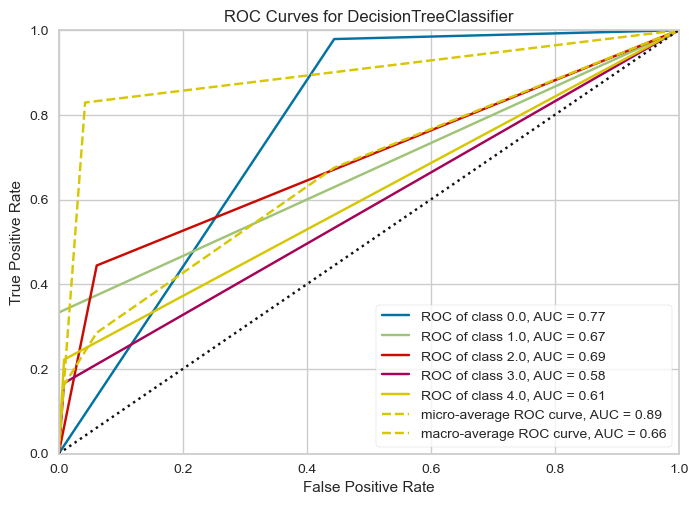

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [83]:
# Inicializa y ajusta el visualizador de la curva ROC
roc_viz = ROCAUC(best_tree_model, classes=best_tree_model.classes_)
roc_viz.fit(X_train, y_train)
roc_viz.score(X_test, y_test)
roc_viz.show()

En este caso vemos como la curva ROC en las clases es similar a la anterior , al variar el umbral  la tasa de falsos positivos se dispara mientas que la de True positive casi no aumenta, en nuestro caso queremos un valor de true positive mayor, porque necesitamos encontrar comprobar los siguientes modelos

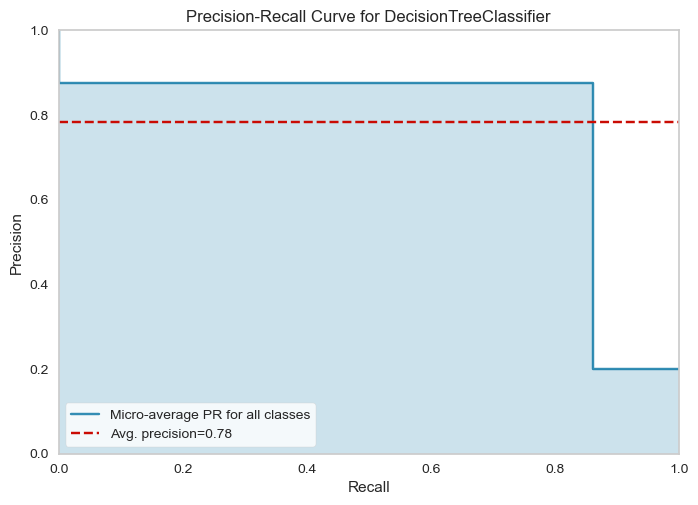

<Axes: title={'center': 'Precision-Recall Curve for DecisionTreeClassifier'}, xlabel='Recall', ylabel='Precision'>

In [84]:
# Inicializa y ajusta el visualizador de la curva PR
viz = PrecisionRecallCurve(best_tree_model, classes=best_tree_model.classes_) # para ver por clase per_class=True
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

EN este curva PR, nos encontramos en una situación muy similar y lo vamos a ver repetidas en las siguientes seguramente, ya que al ser una media,los valores de los clases con menosclasifiaciones se van a diluir en la clase principal, por lo que nos vamos a encontrar un rendimiento muy similar , pues el rendimiento de todos los modelos era parecido 

* ### Regresión logística

In [85]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Definir el modelo de regresión logística
logreg_model = LogisticRegression()

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {'C': [0.01, 0.1, 1, 10,50, 100],'penalty': ['l1', 'l2'],'solver': ['liblinear', 'saga']}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=logreg_model, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Imprimir los resultados
print("Mejor resultado (media) en validación cruzada: {:.2f}".format(grid_search.best_score_))
print("Mejor clasificador encontrado:", grid_search.best_estimator_)
print("Evaluación sobre el conjunto de test: {:.2f}".format(grid_search.score(X_test, y_test)))

# Obtener el mejor modelo de regresión logística
best_logreg_model = grid_search.best_estimator_


Mejor resultado (media) en validación cruzada: 0.93
Mejor clasificador encontrado: LogisticRegression(C=10, penalty='l1', solver='liblinear')
Evaluación sobre el conjunto de test: 0.85


In [86]:
# Obtener y mostrar la matriz de confusión
y_pred = best_logreg_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión:")
print(conf_matrix)


classification_rep = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(classification_rep)

Matriz de Confusión:
[[96  0  0  0  0]
 [ 0  1  0  1  1]
 [ 6  0  1  1  1]
 [ 5  0  0  1  0]
 [ 3  0  0  1  5]]
Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.87      1.00      0.93        96
         1.0       1.00      0.33      0.50         3
         2.0       1.00      0.11      0.20         9
         3.0       0.25      0.17      0.20         6
         4.0       0.71      0.56      0.63         9

    accuracy                           0.85       123
   macro avg       0.77      0.43      0.49       123
weighted avg       0.84      0.85      0.81       123



Usando regresión logística podemos ver que los resultados empeoran con respecto al modelo anterior y nos acercamos más a los resultados obtenidos en KNN, el modelo clasifica bien usando como clase positiva la primera y mayoritaria, pero los demás valores siguen siendo bajos, a excepción de la clasificación de la clase 4 que aumenta hasta un recall de 56%

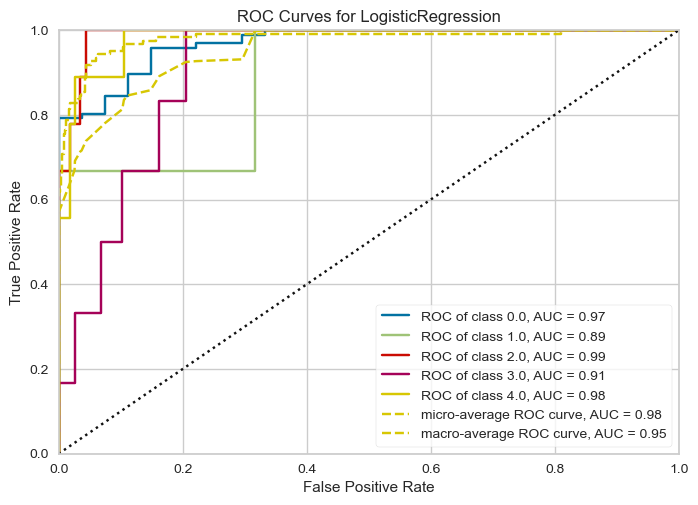

<Axes: title={'center': 'ROC Curves for LogisticRegression'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [87]:
# Inicializa y ajusta el visualizador de la curva ROC
roc_viz = ROCAUC(best_logreg_model, classes=best_logreg_model.classes_)
roc_viz.fit(X_train, y_train)
roc_viz.score(X_test, y_test)
roc_viz.show()

En este caso vemos curvas mejores definidas y que se acercan más a la esquina superior izquierda (que refleja la mejor situación). Al aumentar el umbral aumentan los falsos positivos pero en una medida mucho más pequeña, obteniendo mucho mejores resultados

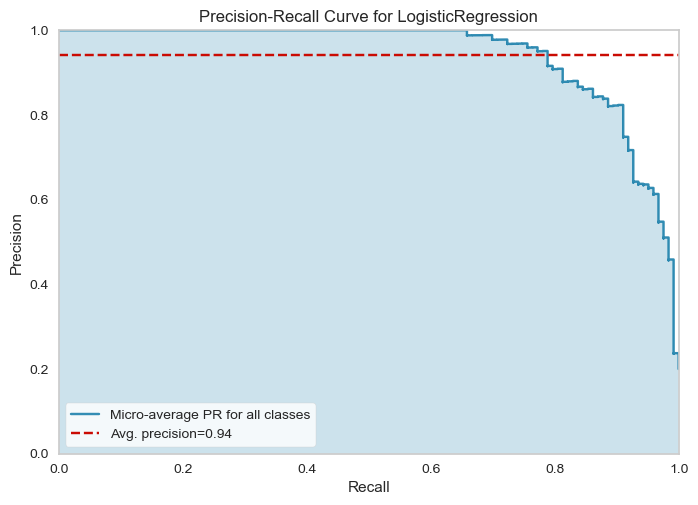

<Axes: title={'center': 'Precision-Recall Curve for LogisticRegression'}, xlabel='Recall', ylabel='Precision'>

In [88]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(best_logreg_model,cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

Este caso es mejor que los anteriores, presenta un mejor recall manteniendo la precisión, no como en los casos anteriores que al llegar al 80% caia drásticamente.
Podemos ver que un buen umbral estaría  con un recall del 90% y mantiendo una precisión del 85% aproximadamente, es el punto más cercano a la esquina

* ### SVC

In [89]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma': [0.001, 0.01, 0.1, 1, 10, 100],}

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
grid_search = GridSearchCV(SVC(), param_grid, cv=5,
                          return_train_score=True) # Se necesita par evitar warnings a partir de la 0.21

grid_search.fit(X_train, y_train)

print("Mejor resultado (media) en validación cruzada: {:.2f}".format(grid_search.best_score_))
print("Mejor clasificador encontrado: {}", grid_search.best_estimator_)
print("Evaluación sobre el conjunto de test: {:.2f}".format(grid_search.score(X_test, y_test)))

best_svc_model = grid_search.best_estimator_

Mejor resultado (media) en validación cruzada: 0.93
Mejor clasificador encontrado: {} SVC(C=10, gamma=1)
Evaluación sobre el conjunto de test: 0.84


In [90]:
# Obtener y mostrar la matriz de confusión
y_pred = best_svc_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión:")
print(conf_matrix)


classification_rep = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(classification_rep)

Matriz de Confusión:
[[96  0  0  0  0]
 [ 1  1  0  1  0]
 [ 7  0  1  0  1]
 [ 5  0  0  1  0]
 [ 5  0  0  0  4]]
Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.84      1.00      0.91        96
         1.0       1.00      0.33      0.50         3
         2.0       1.00      0.11      0.20         9
         3.0       0.50      0.17      0.25         6
         4.0       0.80      0.44      0.57         9

    accuracy                           0.84       123
   macro avg       0.83      0.41      0.49       123
weighted avg       0.84      0.84      0.79       123



Aplicando SVC obtenemos un modelo casi identico al anterior, presenta los mismo problemas aunque se ve que en este caso también mantiene la mejora en el recall de la clase 4, aunque de un 44% en vez de un 56%

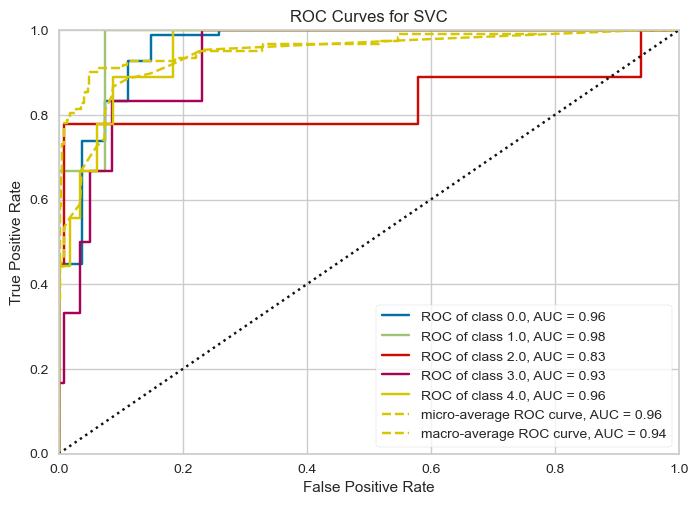

<Axes: title={'center': 'ROC Curves for SVC'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [91]:
# Inicializa y ajusta el visualizador de la curva ROC
roc_viz = ROCAUC(best_svc_model, classes=best_svc_model.classes_)
roc_viz.fit(X_train, y_train)
roc_viz.score(X_test, y_test)
roc_viz.show()

Este caso es similar al anterior peropodemos observar que la clase 2 (la roja) hay un punto donde aumenta exponencialmente los falsos positivos al aumentar los True positive

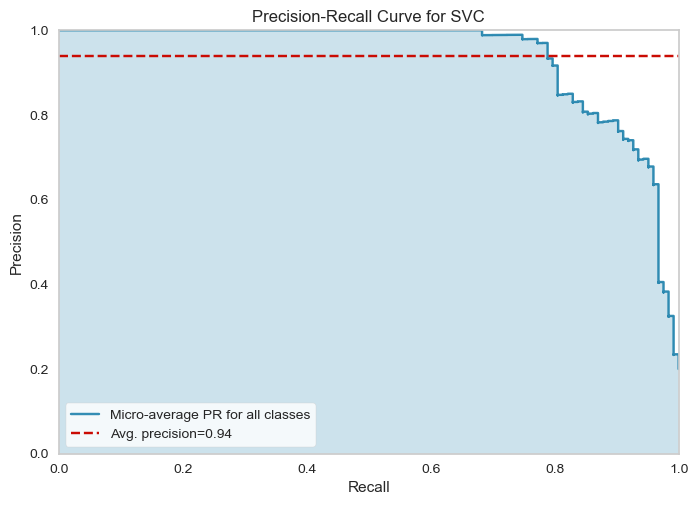

<Axes: title={'center': 'Precision-Recall Curve for SVC'}, xlabel='Recall', ylabel='Precision'>

In [92]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(best_svc_model,cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

Este caso es igual que el anterior, quizás es un poco menor comparadola en los valores más altos del recall 

* ### Redes 

In [93]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

# Definir el modelo de red neuronal
nn_classifier = MLPClassifier(max_iter=1000)

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    'hidden_layer_sizes': [(32,),(64,),(32, 32),],'activation': ['logistic', 'tanh', 'relu'],'solver': ['lbfgs', 'sgd', 'adam','softmax']
}

# Realizar la búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(estimator=nn_classifier, param_grid=param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid_search.fit(X_train, y_train)

# Imprimir los resultados
print("Mejor resultado (media) en validación cruzada: {:.2f}".format(grid_search.best_score_))
print("Mejor clasificador encontrado:", grid_search.best_estimator_)
print("Evaluación sobre el conjunto de test: {:.2f}".format(grid_search.score(X_test, y_test)))

# Obtener el mejor modelo de red neuronal
best_nn_model = grid_search.best_estimator_


Mejor resultado (media) en validación cruzada: 0.92
Mejor clasificador encontrado: MLPClassifier(activation='logistic', hidden_layer_sizes=(32,), max_iter=1000,
              solver='lbfgs')
Evaluación sobre el conjunto de test: 0.85


In [94]:
# Obtener y mostrar la matriz de confusión
y_pred = best_nn_model.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Matriz de Confusión:")
print(conf_matrix)
print()

classification_rep = classification_report(y_test, y_pred)
print("Informe de Clasificación:")
print(classification_rep)

Matriz de Confusión:
[[95  0  0  1  0]
 [ 1  1  0  0  1]
 [ 1  0  5  1  2]
 [ 3  0  2  1  0]
 [ 3  0  1  2  3]]

Informe de Clasificación:
              precision    recall  f1-score   support

         0.0       0.92      0.99      0.95        96
         1.0       1.00      0.33      0.50         3
         2.0       0.62      0.56      0.59         9
         3.0       0.20      0.17      0.18         6
         4.0       0.50      0.33      0.40         9

    accuracy                           0.85       123
   macro avg       0.65      0.48      0.52       123
weighted avg       0.84      0.85      0.84       123



Finalmente para este caso en el que hemos aplicado redes, vemos que aunque tiendo como clase positiva la 3 un recall muy malo, en los demás valores ha presentado una mejora, a excepción de la clase 0 que pasa de un 100 a un 99%, pero teniendo en cuenta la distribución de muestras en general es mejor

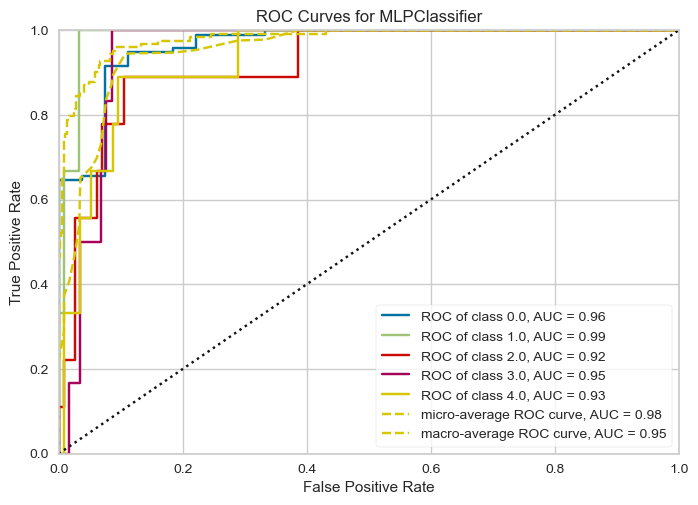

<Axes: title={'center': 'ROC Curves for MLPClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [95]:
# Inicializa y ajusta el visualizador de la curva ROC
roc_viz = ROCAUC(best_nn_model, classes=best_nn_model.classes_)
roc_viz.fit(X_train, y_train)
roc_viz.score(X_test, y_test)
roc_viz.show()

Esta curva ROC es la mejor que hemos visto, todos los valores de clasificación están cercanos al 1 y tienen un valor "aceptable" de falsos positivos. Podemos ver que la linea amarilla y roja (clases 2 y 4) hay un punto que al llegar a un valor de TP del 90% crecen su número de falsos positivos, pero el rendimmiento general es bueno

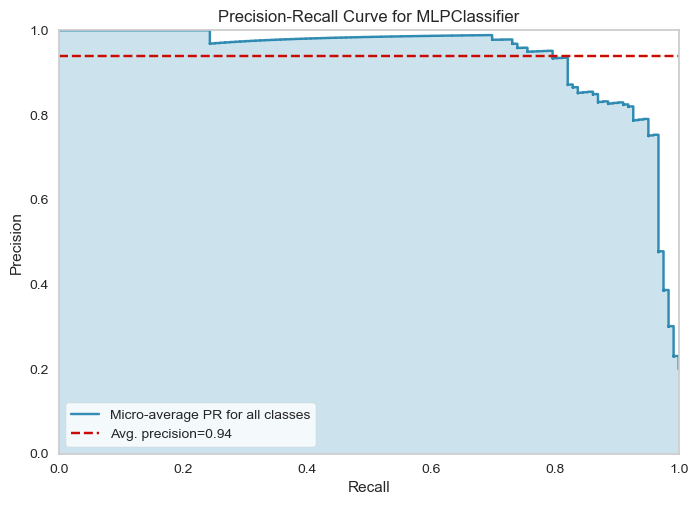

<Axes: title={'center': 'Precision-Recall Curve for MLPClassifier'}, xlabel='Recall', ylabel='Precision'>

In [96]:
# Create the visualizer, fit, score, and show it
viz = PrecisionRecallCurve(best_nn_model,cmap="Set1")
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show()

En este último caso vemos exactamente lo mismo que en los anteriores, una buena curva, próxima a al valor de precision y recall de 1. Quizás podemos detectar una mínima mejora pues al 95% del recall maniene una rpecisión del 80%

# Bibliografía

https://imbalanced-learn.org/stable/auto_examples/api/plot_sampling_strategy_usage.html#sphx-glr-auto-examples-api-plot-sampling-strategy-usage-py


https://builtin.com/data-science/when-and-why-standardize-your-data

https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html

https://wbarriosb.medium.com/calculando-la-precisi%C3%B3n-en-un-modelo-de-clasificaci%C3%B3n-multiclase-224d96f52043


